## Network building

In [1]:
import networkx as nx
import warnings
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from datetime import datetime
import random
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
nodes = pd.read_csv('nodes.csv', index_col = False)
edges = pd.read_csv('edges.csv', index_col = False)
G = nx.from_pandas_edgelist(edges, source = 'author', target = 'parent_author', create_using = nx.DiGraph())
G.add_nodes_from(nodes)

## Network based statistics 

In [3]:
N = G.number_of_nodes()
N

13171

In [4]:
E = G.number_of_edges()
E

40948

In [5]:
G.is_directed()

True

In [6]:
G_und_rw = G.to_undirected().copy()

In [7]:
G_und_rw.is_directed()

False

## Degree Distribution

In [8]:
# degree for node 1
degrees = G_und_rw.degree
first_node = next(iter(degrees))
first_node[1]

1

In [9]:
sum(dict(G_und_rw.degree()).values())/float(len(G_und_rw))

5.205679143573001

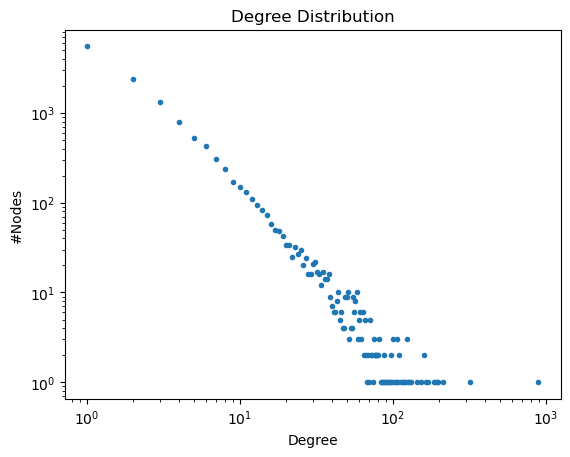

In [10]:
hist = nx.degree_histogram(G_und_rw)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [11]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method = 'KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


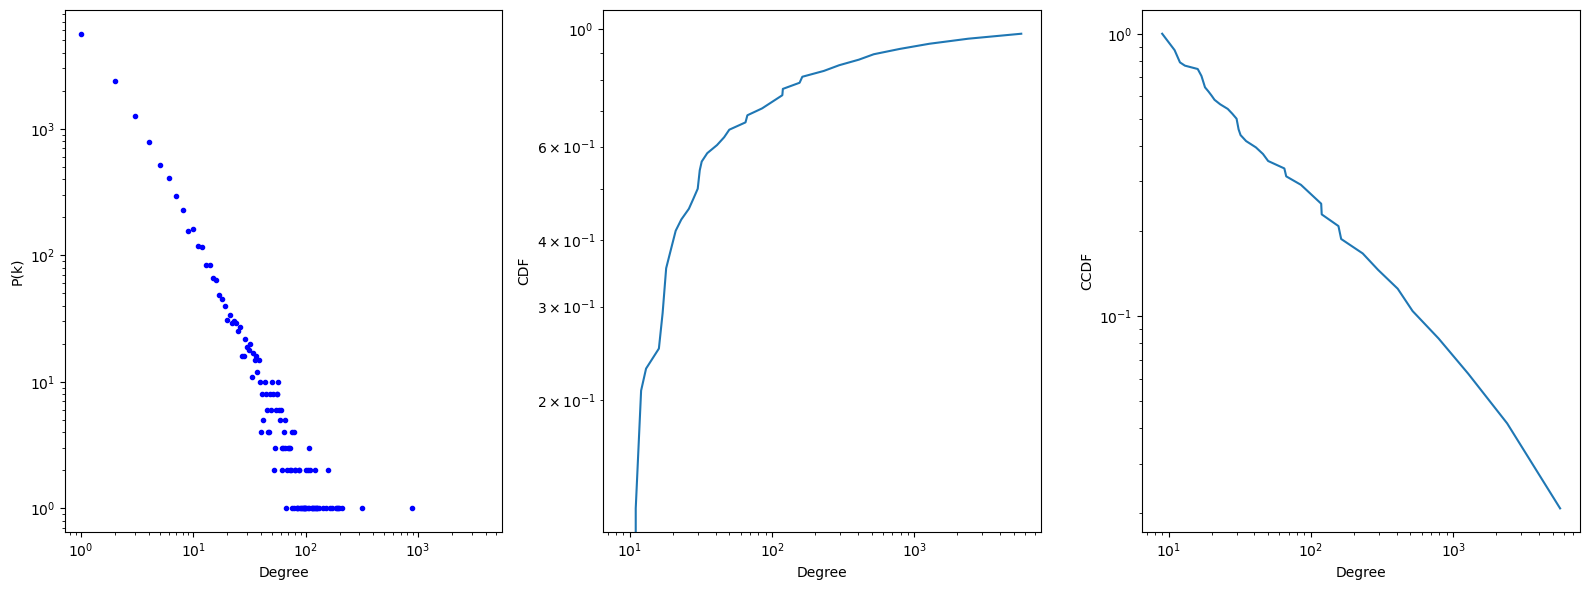

In [12]:
plot_dist(G_und_rw)

## Graph components

In [13]:
list(G_und_rw.neighbors(first_node[0])) # obtain the list of neighobors for the first node

['omgpop']

In [14]:
ego = nx.ego_graph(G_und_rw, first_node[0]) # ego network of the first node

## Connected components

In [15]:
giant_cc = list(nx.connected_components(G_und_rw))
print("Number of connected components: ", len(giant_cc))

Number of connected components:  299


In [16]:
# removes from the graph all nodes that are not in the giant component
G_und_rw.remove_nodes_from([n for n in G if n not in set(giant_cc[0])]) 
giant_cc_2 = list(nx.connected_components(G_und_rw))
print("Length of the giant component: ", len(giant_cc_2))

Length of the giant component:  1


## Path analysis

Build a new graph with sampled nodes due to slowness of path analysis algorithms on the full-size network

In [17]:
from random import sample

In [18]:
node_list_cc=[]
for user in G_und_rw.nodes:
    node_list_cc.append(user)

len(node_list_cc)

12676

## Diameter

In [19]:
random.seed(1024)
sample_n = random.sample(node_list_cc, 3058)
print(sample_n)

len(sample_n)

['NoMeatFingering', 'Icatyes', 'WolandPT', 'Sam54123', 'Jolly-Address-8864', 'alexnag26', 'Gent2022', 'testdaswg234g', 'DrySociety7463', 'Tanzekabe', 'sunkenship08', 'dumbdumbuser', 'Bruhfiki', 'alcalde', 'xXdontshootmeXx', 'tyuoplop', 'XxDONGLORDxX', 'Salted_Sugars', 'areopagitic', 'meggyAnnP', 'B8magicx', 'fund-my-death', 'Marranyo', 'l1lym', 'throwaway2233344446', 'StephenRman', 'Direct_Show_7389', 'Novemberai', 'tangentrification', 'geoelectric', 'NvidiaRTX', 'TheRoyalsapphire', 'Particular_Ad_2856', 'ZiiDii', 'bitsconnect', 'AzureArmageddon', 'drewbug', 'sernamelikewhoishe', 'locomotive100', 'Austin27', 'DVGltd', 'coumineol', 'Zero_Smoke', 'Webdigitalblog', 'shelvac2', 'Zintom', 'WaldeDra', 'guapacz', 'Akeyl_Elwynn', 'deiteorg', 'pleeplious', 'Andwyr44', 'missusmilk', 'sadkins2244', 'LunchWhole4041', 'spinningfinger', 'TastyTastyScience', 'Small-Fall-6500', 'AltAcc34-a', '_karelias', 'CanaryRoyal7901', 'villanodev', 'qiaodan_ci', 'MandarkTheBand', 'diefartz', 'SoulofZ', 'Nightcome

3058

In [20]:
diam_samp=[]
for node in sample_n:
     diam_samp.append(nx.eccentricity(G_und_rw,node))
print(diam_samp) 

[9, 11, 8, 9, 9, 9, 9, 9, 9, 9, 10, 9, 8, 10, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 10, 10, 9, 8, 8, 9, 10, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 8, 9, 9, 8, 9, 9, 11, 9, 10, 12, 9, 9, 9, 8, 10, 10, 10, 9, 10, 9, 9, 9, 10, 9, 9, 9, 9, 9, 11, 10, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 8, 9, 9, 10, 10, 8, 9, 8, 9, 9, 9, 9, 10, 9, 9, 8, 9, 8, 11, 8, 10, 9, 10, 9, 9, 10, 9, 10, 10, 9, 10, 9, 9, 8, 10, 10, 9, 9, 8, 9, 9, 10, 9, 9, 9, 10, 9, 8, 9, 9, 8, 10, 9, 8, 9, 9, 10, 9, 9, 9, 8, 9, 9, 9, 8, 10, 11, 9, 8, 9, 9, 9, 8, 10, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9, 10, 8, 10, 9, 9, 10, 10, 9, 9, 9, 9, 9, 8, 9, 8, 10, 10, 9, 10, 10, 9, 9, 9, 8, 9, 9, 9, 9, 10, 9, 9, 8, 8, 9, 9, 9, 9, 10, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 10, 9, 10, 9, 9, 8, 10, 9, 10, 9, 9, 9, 8, 9, 10, 8, 8, 9, 9, 8, 8, 10, 8, 9, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 11, 8, 10, 9, 9, 9, 10, 9, 10, 10, 9, 9, 9, 9, 8, 10, 9, 10, 10, 9, 9, 9, 10, 10, 9, 9, 8, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 11, 9,

In [21]:
max(diam_samp)

12


### Shortest path

In [22]:
giant_cc = list(nx.connected_components(G_und_rw)) # return one single giant component
print("Number of Connected Components: ", len(giant_cc))

print("Average shortest path (of giant cc with) = ", nx.average_shortest_path_length(G_und_rw))

Number of Connected Components:  1
Average shortest path (of giant cc with) =  4.313121480715237


## Clustering coefficient 

In [23]:
clustering_coefficient = nx.average_clustering(G_und_rw)  
print('Global clustering coefficient:', clustering_coefficient)

Global clustering coefficient: 0.045121689086150114


In [24]:
nx.clustering(G_und_rw)

{'-----fuck-----': 0,
 'omgpop': 0,
 '---LefeverDream---': 0,
 'SpaceNigiri': 0.022792022792022793,
 '---nom---': 0,
 'MsolProd': 0.030303030303030304,
 '--DMH--': 0,
 'KNCSPROD': 0,
 '--lolwutroflwaffle--': 0,
 'bilbobeenus34': 0,
 'mus3man42': 0,
 '--ticktock--': 0,
 'justV_2077': 0,
 '-A1': 0,
 'Broad_Safe8247': 0.01818181818181818,
 '-Amy_May-': 1.0,
 'cigo999': 0.022058823529411766,
 '-BrowsingRandomly-': 0,
 'swift_master': 0,
 'ReduxedProfessor': 0.015384615384615385,
 '-captain_kirkland-': 0,
 'Lord_Skellig': 0.03684210526315789,
 'Vancapone': 0,
 '-CoachMcGuirk-': 0,
 'Nillows': 0.020689655172413793,
 'CoherentPanda': 0.018648018648018648,
 'marc6854': 0.029239766081871343,
 '-Dareme9366': 0,
 'robbmanes-com': 0.012477718360071301,
 '-DeathItself-': 0,
 'SameVanilla6657': 0,
 '-doomrah-': 0.030303030303030304,
 'WalkProfessional8969': 0.03484320557491289,
 'thecoffeejesus': 0.013793103448275862,
 'Kimosh_7': 0,
 'Tinsnow1': 0.009523809523809525,
 'Leomaner124': 0.0181818181818

## Density

In [25]:
density=nx.density(G_und_rw)
print('density:', density)

density: 0.00042224881946220877


## Centrality analysis

for simplicity's sake the analysis is performed on the undirected version of the network

**Ho fatto tutto per il grafo indiretto, forse cambiano risultati**

In [26]:
degrees = dict(G_und_rw.degree())

In [27]:
# different results, maybe on the old data

In [28]:
# top 10 nodes with highest degree

ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10] 

[('hi_there_bitch', 892),
 ('TerrySharpHY', 321),
 ('TwoCoresOneThread', 212),
 ('perturbaitor', 199),
 ('ClinicalIllusionist', 195),
 ('drekmonger', 192),
 ('SnipingNinja', 186),
 ('FireblastU', 171),
 ('antigonemerlin', 164),
 ('kamus10', 159)]

### Closeness Centrality Measure

In [29]:
closeness = nx.closeness_centrality(G_und_rw) # compute the closeness centrality of all nodes 

In [30]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
coleseness_10 = ranks[0:10]

In [31]:
dict_close = dict(coleseness_10)

In [32]:
closeness_value_frame=pd.DataFrame.from_dict(dict_close,orient='index', columns=['Closeness Value'])
closeness_value_frame

,Closeness Value
hi_there_bitch,0.361554
Mr_Compyuterhead,0.348674
Eriane,0.342558
TerrySharpHY,0.342531
antigonemerlin,0.340122
SnipingNinja,0.339667
TwoCoresOneThread,0.338940
kamus10,0.338542
FireblastU,0.337766
drekmonger,0.337595


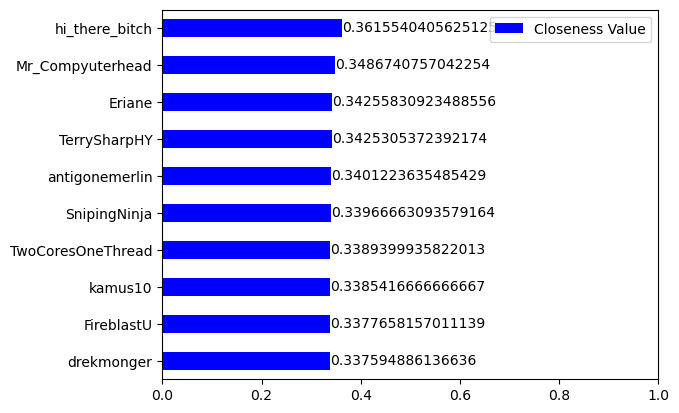

In [33]:
closeness_value_frame = closeness_value_frame.sort_values(by='Closeness Value', ascending=True)

fig = plt.figure()
ax = fig.add_subplot()

closeness_value_frame.plot(kind='barh', color='blue', ax=ax)
plt.xlim(0, 1)

for y, x in enumerate(closeness_value_frame['Closeness Value']):
    plt.annotate(str(x), xy=(x, y), va='center')

plt.show()

### Betweenness Centrality

In [34]:
betweenness = nx.betweenness_centrality(G_und_rw) 

In [35]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:20]

[('hi_there_bitch', 0.14843812864425898),
 ('TerrySharpHY', 0.04501477864951547),
 ('TwoCoresOneThread', 0.030883998475627974),
 ('drekmonger', 0.029608464172886668),
 ('SnipingNinja', 0.028314852640342926),
 ('ClinicalIllusionist', 0.027544723589424183),
 ('Mr_Compyuterhead', 0.02700412328679219),
 ('FireblastU', 0.026099661974099766),
 ('perturbaitor', 0.025617109937742306),
 ('antigonemerlin', 0.023846232171968545),
 ('kamus10', 0.02313610398453143),
 ('Ok-Hunt-5902', 0.020139036528725875),
 ('Eriane', 0.018584041542587703),
 ('nebson10', 0.01763196545248895),
 ('InSearchOfUpdog', 0.017624100925631894),
 ('Dyson1337', 0.01692451652391397),
 ('Paradox_Dolphin', 0.01626873378738752),
 ('jaygreen720', 0.016044733096053927),
 ('mredda', 0.01563462745383339),
 ('cristiano-potato', 0.01554450472719984)]

### Harmonic Centrality

### Harmonic mean of the geodesic (shorted paths) distances from a given node to all others

In [36]:
harmonic = nx.harmonic_centrality(G_und_rw)

In [37]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:20]

[('hi_there_bitch', 5182.2107142855775),
 ('Mr_Compyuterhead', 4758.622619047692),
 ('TerrySharpHY', 4721.579761904851),
 ('Eriane', 4656.198809523917),
 ('antigonemerlin', 4636.908333333453),
 ('kamus10', 4621.0416666667925),
 ('TwoCoresOneThread', 4619.136904762042),
 ('SnipingNinja', 4617.220238095372),
 ('drekmonger', 4593.354761904904),
 ('FireblastU', 4591.630952381093),
 ('ClinicalIllusionist', 4564.320238095427),
 ('michaelochurch', 4552.7583333335115),
 ('perturbaitor', 4541.515476190661),
 ('Paradox_Dolphin', 4498.755952381176),
 ('Dyson1337', 4492.946428571619),
 ('SuddenDragonfly8125', 4474.075000000199),
 ('Ok-Hunt-5902', 4462.446428571661),
 ('frequenttimetraveler', 4457.015476190676),
 ('cristiano-potato', 4414.307142857391),
 ('redmera', 4408.547619047838)]

### PageRank Centrality

In [38]:
pagerank = nx.pagerank(G_und_rw)

In [39]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:20]

[('hi_there_bitch', 0.01585766526027533),
 ('TerrySharpHY', 0.005216585678577523),
 ('TwoCoresOneThread', 0.0027231277179534156),
 ('ClinicalIllusionist', 0.002485181248050116),
 ('perturbaitor', 0.002411717772825016),
 ('drekmonger', 0.002351614183181277),
 ('SnipingNinja', 0.002082540744441492),
 ('FireblastU', 0.0020257069088619466),
 ('antigonemerlin', 0.001992206067718328),
 ('Ok-Hunt-5902', 0.001956338389231213),
 ('kamus10', 0.0019270824274090536),
 ('MildlyMoistSock', 0.0018512531612161418),
 ('Mr_Compyuterhead', 0.0018143632281440241),
 ('jaygreen720', 0.0018051685968689109),
 ('mredda', 0.0017095476416635097),
 ('hobblyhoy', 0.0016768458244222368),
 ('nebson10', 0.0016439429993911417),
 ('InSearchOfUpdog', 0.0016101502874522038),
 ('Fresh-Cow-1931', 0.0015652159936003194),
 ('walkerspider', 0.0015217830621573516)]

### Eigenvector Centrality

In [40]:
eigen = nx.eigenvector_centrality(G_und_rw, max_iter = 500)

In [41]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:20]

[('hi_there_bitch', 0.5052275657348251),
 ('TerrySharpHY', 0.11643471175513195),
 ('antigonemerlin', 0.10821887788497501),
 ('Mr_Compyuterhead', 0.10745884527778413),
 ('perturbaitor', 0.10117562491170601),
 ('kamus10', 0.10066546280772568),
 ('SnipingNinja', 0.0977714933393425),
 ('Eriane', 0.09466996280203491),
 ('drekmonger', 0.09429281685629799),
 ('TwoCoresOneThread', 0.09099386232594989),
 ('michaelochurch', 0.08822266540322841),
 ('FireblastU', 0.08294296377130894),
 ('ClinicalIllusionist', 0.0812350788829264),
 ('frequenttimetraveler', 0.08109653193570746),
 ('SuddenDragonfly8125', 0.06734341178371644),
 ('Paradox_Dolphin', 0.06693833367790254),
 ('cristiano-potato', 0.06680199732476018),
 ('Ok-Hunt-5902', 0.06450390432900793),
 ('Ah_Q', 0.06091912680366541),
 ('machyume', 0.060553019587244634)]

### Newman's Assortativity

Quantifies homophily while scalar node properties are involved (e.g., degree). 
Degree assortative: nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs). 
Degree disassortative: nodes tends to connect in a star-like topology

In [42]:
nx.degree_assortativity_coefficient(G_und_rw)  #varia di poco dovrebe essere 0.065

-0.06721012013355883

# COMPARISON WITH ER AND BA MODELS

## Erdos-Renyi graph

p = 2L/N(N-1) = 240948 / (13171 13170) = 0,0004721262694

In [43]:
N

13171

In [44]:
p = 0.0004721262694
p

0.0004721262694

In [45]:
er = nx.erdos_renyi_graph(N, p, seed=None) # inverse formula: p(n(n-1)/2)

In [46]:
er

In [47]:
N_er = er.number_of_nodes()
N_er

13171

In [48]:

E_er = er.number_of_edges() #dovrebbe essere 40917
E_er



40739

In [49]:
er.is_directed()

False

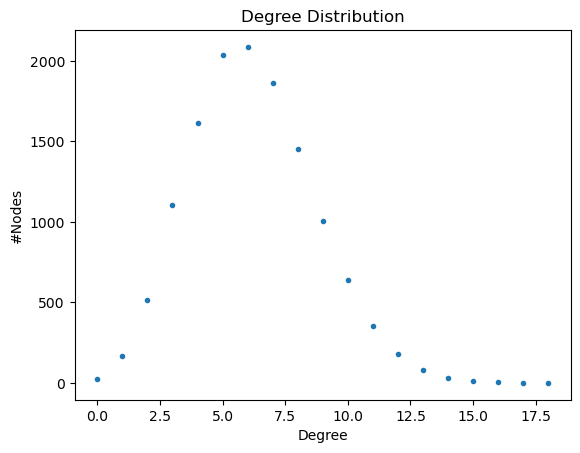

In [50]:
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

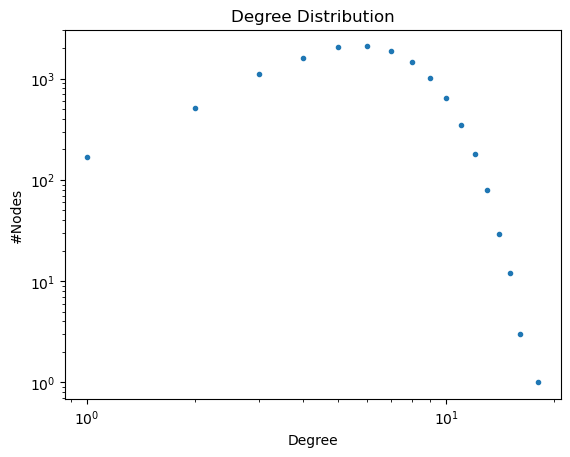

In [51]:
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

## Network base statistics

In [52]:
N_er = er.number_of_nodes()
N_er

13171

In [53]:
E_er = er.number_of_edges() #dovrebbe essere 40917
E_er

40739

In [54]:
er.is_directed()

False

### Degree distribution

In [55]:
# degree for node 1
degrees = er.degree
first_node = next(iter(degrees))
first_node[1] #dovrebbe essere 3

10

In [56]:
sum(dict(er.degree()).values())/float(len(er)) #dovrebbe essere 6.21

6.1861665780882245

## Graph components

In [57]:
## dovrebbero esserci solo 3 

In [58]:
list(er.neighbors(first_node[0])) # obtain the list of neighobors for the first node

[150, 920, 1411, 3521, 4297, 4561, 5336, 8910, 9539, 12267]

In [59]:
ego = nx.ego_graph(er, first_node[0]) # ego network of the first node

## Connected components

In [60]:
nx.number_connected_components(er) #31

28

In [61]:
comps = list(nx.connected_components(er))
comp_0 = nx.subgraph(er, comps[0])

Calculating best minimal value for power law fit


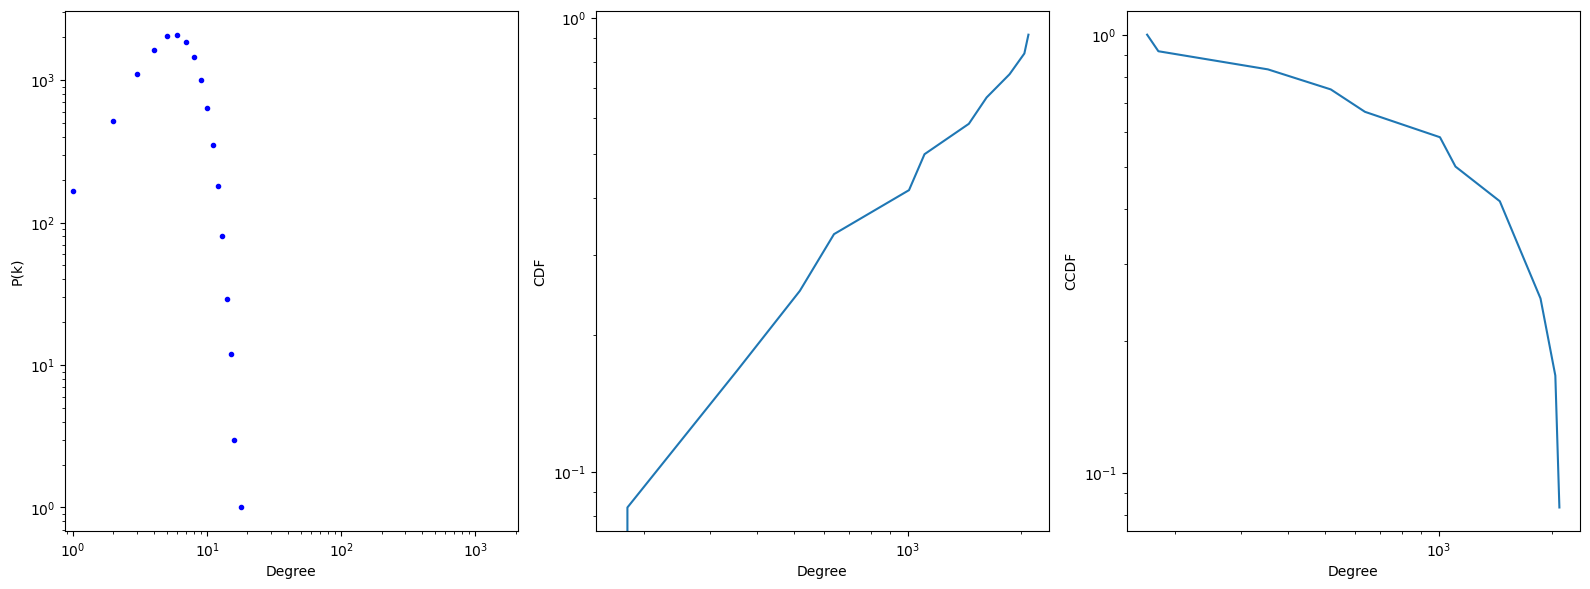

In [62]:
plot_dist(er)

Type of regime

**Supercritial**  regime p > 1/N --> 0.00047 > 0.000076

## Path analysis

In [63]:
giant_cc = sorted(nx.connected_components(er), key=len, reverse=True) 

#rimuove dal grafo tutto i nodi che non sono nella componente gigante
er.remove_nodes_from([n for n in G if n not in set(giant_cc[0])])

In [64]:
node_list_cc_er=[]
for user in er.nodes:
    node_list_cc_er.append(user)

len(node_list_cc_er)

13171

### Diameter

In [65]:
random.seed(1024)
sample_n_er = random.sample(node_list_cc_er, 3058)
print(sample_n_er)

len(sample_n_er)

[13058, 313, 7921, 6380, 5295, 12986, 8516, 1645, 7292, 8403, 5994, 11826, 11730, 6042, 6363, 13009, 1573, 11656, 12203, 2296, 13068, 6381, 1675, 6711, 2540, 7146, 7765, 7310, 12038, 8600, 5687, 10101, 9959, 1446, 576, 1368, 10427, 12615, 1344, 1677, 5931, 11292, 5477, 55, 6075, 4928, 2989, 2209, 2615, 6375, 4683, 2639, 1488, 3752, 9545, 1982, 7528, 11170, 9202, 388, 11431, 6724, 352, 351, 4046, 12322, 2537, 5466, 5636, 7558, 10000, 2853, 9000, 11331, 13072, 13096, 6983, 997, 1098, 6284, 1611, 11911, 9771, 6373, 3071, 3511, 11561, 563, 3069, 10124, 10768, 5410, 4931, 6723, 7615, 8451, 1345, 10184, 5939, 1554, 4204, 625, 13032, 1141, 12564, 13020, 9781, 2987, 2056, 8673, 7954, 5304, 6950, 7553, 5794, 1276, 9513, 8066, 12752, 5876, 8827, 2806, 1556, 4016, 8338, 9057, 12625, 10630, 6882, 10775, 8366, 8078, 10735, 2219, 142, 3631, 5070, 6127, 12402, 2440, 11683, 9177, 3355, 1765, 5568, 4192, 4652, 7824, 427, 11769, 5512, 460, 8997, 6277, 2321, 4021, 7422, 12239, 3514, 1584, 2353, 12044, 25

3058

In [69]:
diam_samp_er=[]
if nx.is_connected(er):
    for node in sample_n_er:
         diam_samp_er.append(nx.eccentricity(er,node))
    print(diam_samp_er)
else:
    print("The graph is not connected")

The graph isn't connected


In [70]:
#max(diam_samp)

### Shortest path

In [72]:
if nx.is_connected(er):
    giant_cc_er = list(nx.connected_components(er)) #ok ritorna solo 1 componente gigante
    print("Number of Connected Components of 'G_indiretto': ", len(giant_cc_er))

    print("Average shortest path (of giant cc with) = ", (x.values() for x in nx.average_shortest_path_length(er)))
else:
    print("The graph is not connected")

The graph isn't connected


## Clustering Coefficient

In [73]:
clustering_coefficient = nx.average_clustering(er)
print('Global clustering coefficient:', clustering_coefficient)

Global clustering coefficient: 0.00038551111362591093


In [74]:
nx.clustering(er)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0.022222222222222223,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 1

## Density

In [75]:
density=nx.density(er)
print('density:', density)

density: 0.00046971652073562824


## Centrality analysis

In [76]:
degrees = dict(er.degree())

In [77]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(8799, 18),
 (10426, 16),
 (11781, 16),
 (11795, 16),
 (293, 15),
 (679, 15),
 (1126, 15),
 (3874, 15),
 (6496, 15),
 (8310, 15)]

## Closeness Centrality Measure

In [78]:
closeness_er = nx.closeness_centrality(er) # compute the closeness centrality of all nodes 

In [79]:
ranks = [(k, v) for k, v in sorted(closeness_er.items(), key=lambda item: -item[1])]
coleseness_10_er = ranks[0:10]

In [80]:
dict_close_er = dict(coleseness_10_er)

In [81]:
closeness_value_frame_er=pd.DataFrame.from_dict(dict_close_er,orient='index', columns=['Closeness Value'])
closeness_value_frame_er

,Closeness Value
12885,0.211389
8799,0.209268
1126,0.208105
10426,0.207931
7224,0.207861
9577,0.207496
4454,0.207228
11795,0.207113
6496,0.207028
10590,0.206542


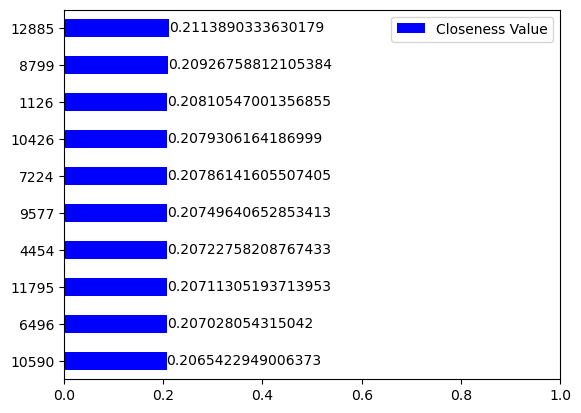

In [82]:
closeness_value_frame_er = closeness_value_frame_er.sort_values(by='Closeness Value', ascending=True)

fig = plt.figure()
ax = fig.add_subplot()

closeness_value_frame_er.plot(kind='barh', color='blue', ax=ax)
plt.xlim(0, 1)

for y, x in enumerate(closeness_value_frame_er['Closeness Value']):
    plt.annotate(str(x), xy=(x, y), va='center')

plt.show()

## Betweenness Centrality

In [83]:
betweenness_er = nx.betweenness_centrality(er) 

In [84]:
ranks = [(k, v) for k, v in sorted(betweenness_er.items(), key=lambda item: -item[1])]
ranks[0:20]

[(8799, 0.0023295468931819018),
 (10426, 0.0019752795866410503),
 (12885, 0.001955436144255777),
 (3874, 0.0019022873846180682),
 (11795, 0.0018983927441386227),
 (9577, 0.0018102279722746473),
 (1126, 0.0018096889347488448),
 (11781, 0.00179244896644086),
 (6496, 0.0017772343070347125),
 (4454, 0.0017766104369881283),
 (293, 0.0017713803262153353),
 (9133, 0.0017046384963085178),
 (4876, 0.00163891516607957),
 (10868, 0.0016235240130450918),
 (7224, 0.0015982899379734714),
 (12300, 0.0015709935917529237),
 (9972, 0.0015694131653142458),
 (4521, 0.0015617497816110344),
 (11677, 0.0015596560927088011),
 (1603, 0.0015527606486697998)]

## Harmonic Centrality

In [85]:
harmonic_er = nx.harmonic_centrality(er)

In [86]:
ranks = [(k, v) for k, v in sorted(harmonic_er.items(), key=lambda item: -item[1])]
ranks[0:20]

[(12885, 2888.345238095001),
 (8799, 2862.520238095014),
 (1126, 2842.967857142632),
 (10426, 2842.161904761663),
 (7224, 2838.5285714283464),
 (9577, 2835.5785714283443),
 (4454, 2831.5178571426436),
 (11795, 2829.979761904547),
 (6496, 2828.991666666429),
 (293, 2819.4035714283573),
 (10590, 2818.570238095013),
 (413, 2818.479761904552),
 (1913, 2817.2940476188355),
 (4876, 2816.6214285712153),
 (3874, 2812.407142856929),
 (11677, 2810.820238095028),
 (3972, 2810.6285714283563),
 (11781, 2807.999999999796),
 (1603, 2807.920238095029),
 (6114, 2807.8619047616753)]

## PageRank Centrality

In [87]:
pagerank_er = nx.pagerank(er)

In [88]:
ranks = [(k, v) for k, v in sorted(pagerank_er.items(), key=lambda item: -item[1])]
ranks[0:20]

[(8799, 0.0001974226886782025),
 (10426, 0.0001789055583568514),
 (11781, 0.0001761853819788731),
 (11795, 0.00017372111981707287),
 (8310, 0.0001731593756186676),
 (8553, 0.0001706628294869949),
 (679, 0.00016826025375177658),
 (12300, 0.00016698849605771842),
 (9782, 0.00016661073686199187),
 (10868, 0.0001647880278604324),
 (293, 0.00016433361027948646),
 (3874, 0.0001628633081876319),
 (1126, 0.0001619756817499523),
 (6496, 0.00016170475687302918),
 (9577, 0.00016169455059354383),
 (1398, 0.00015931192604398578),
 (11677, 0.00015871524053258943),
 (119, 0.0001584810236825713),
 (2321, 0.00015812940934756454),
 (12885, 0.00015789552003716336)]

## Eigenvector Centrality

In [89]:
eigen_er = nx.eigenvector_centrality(er, max_iter = 500)

In [90]:
ranks = [(k, v) for k, v in sorted(eigen_er.items(), key=lambda item: -item[1])]
ranks[0:20]

[(12885, 0.0322186631802678),
 (8799, 0.030182919766169866),
 (10426, 0.027944630932420125),
 (1126, 0.026842844300026654),
 (9577, 0.0265037033240497),
 (6496, 0.02631262531600236),
 (4454, 0.026184005695089035),
 (293, 0.025896951305965237),
 (11795, 0.025753491905391827),
 (7224, 0.025548948839919827),
 (10590, 0.024638445118622582),
 (11781, 0.02453174929056812),
 (1913, 0.024477859637007052),
 (4876, 0.024445394211357434),
 (9777, 0.02429333429899892),
 (2992, 0.02388999549051978),
 (10731, 0.023851976813846147),
 (1603, 0.02382504441495637),
 (11677, 0.0236206638273084),
 (6114, 0.023443634750311935)]

## Newman's Assortativity

In [91]:
nx.degree_assortativity_coefficient(er) 

-0.0009006516859808513

# Barabasi-Albert graph

m = < k >/2 = 6.217902968643231/2 = 3.1089514843216155

In [92]:
m = 3 # 3.1089514843216155
ba = nx.barabasi_albert_graph(N, m)

## Network base statistics

In [93]:
N

13171

In [94]:
N_ba = ba.number_of_nodes()
N_ba

13171

In [95]:
E_ba = ba.number_of_edges() 
E_ba

39504

In [96]:
ba.is_directed()

False

## Degree Distribution

In [97]:
# degree for node 1
degrees = ba.degree
first_node = next(iter(degrees))
first_node[1] #390

231

In [98]:
sum(dict(ba.degree()).values())/float(len(ba)) #7.

5.998633361172272

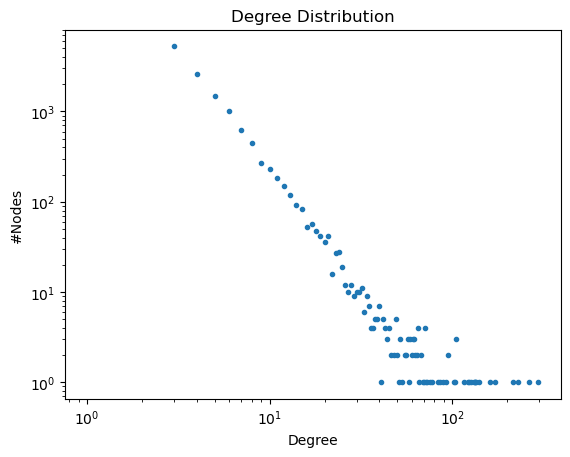

In [99]:
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

Calculating best minimal value for power law fit


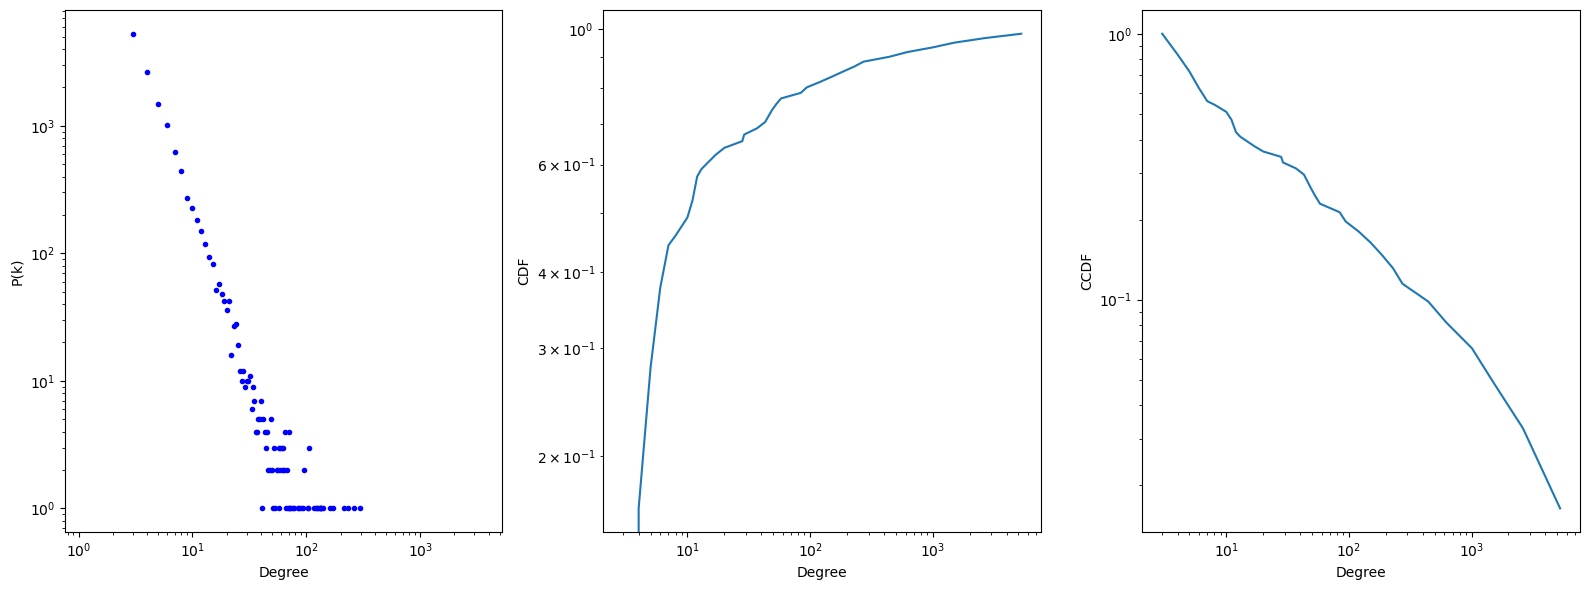

In [100]:
plot_dist(ba)

## Graph components

In [101]:
list(ba.neighbors(first_node[0])) # obtain the list of neighobors for the first node

[1,
 2,
 3,
 4,
 6,
 8,
 9,
 18,
 20,
 31,
 32,
 35,
 46,
 71,
 90,
 97,
 105,
 116,
 145,
 152,
 191,
 193,
 219,
 227,
 253,
 267,
 283,
 292,
 318,
 358,
 458,
 463,
 465,
 475,
 478,
 488,
 517,
 538,
 542,
 574,
 601,
 625,
 626,
 632,
 676,
 713,
 733,
 748,
 755,
 757,
 766,
 775,
 781,
 798,
 833,
 866,
 906,
 922,
 959,
 1002,
 1014,
 1018,
 1022,
 1051,
 1074,
 1096,
 1100,
 1141,
 1162,
 1187,
 1339,
 1340,
 1357,
 1377,
 1379,
 1429,
 1603,
 1610,
 1620,
 1624,
 1647,
 1654,
 1655,
 1708,
 1775,
 1786,
 1804,
 1847,
 1923,
 1939,
 1967,
 2052,
 2094,
 2102,
 2266,
 2296,
 2338,
 2388,
 2389,
 2494,
 2520,
 2661,
 2789,
 2805,
 2820,
 2858,
 2859,
 2901,
 2986,
 2999,
 3159,
 3250,
 3353,
 3367,
 3477,
 3552,
 3582,
 3647,
 3655,
 3748,
 3772,
 3785,
 3933,
 3967,
 4046,
 4084,
 4129,
 4140,
 4152,
 4231,
 4253,
 4358,
 4371,
 4390,
 4404,
 4445,
 4448,
 4449,
 4464,
 4588,
 4743,
 4804,
 4906,
 4952,
 4962,
 5004,
 5019,
 5127,
 5178,
 5211,
 5246,
 5330,
 5583,
 5698,
 576

In [102]:
ego = nx.ego_graph(ba, first_node[0]) # ego network of the first node

## Connected components

In [103]:
nx.number_connected_components(ba)

1

In [104]:
comps = list(nx.connected_components(ba))
comp_0 = nx.subgraph(ba, comps[0])

## Path analysis

In [105]:
giant_cc = sorted(nx.connected_components(ba), key=len, reverse=True) 

#rimuove dal grafo tutto i nodi che non sono nella componente gigante
ba.remove_nodes_from([n for n in G if n not in set(giant_cc[0])])

In [106]:
node_list_cc_ba=[]
for user in ba.nodes:
    node_list_cc_ba.append(user)

len(node_list_cc_ba)

13171

## Diameter

In [107]:
random.seed(1024)
sample_n_ba = random.sample(node_list_cc_ba, 3058)
print(sample_n_ba)

len(sample_n_ba)

[13058, 313, 7921, 6380, 5295, 12986, 8516, 1645, 7292, 8403, 5994, 11826, 11730, 6042, 6363, 13009, 1573, 11656, 12203, 2296, 13068, 6381, 1675, 6711, 2540, 7146, 7765, 7310, 12038, 8600, 5687, 10101, 9959, 1446, 576, 1368, 10427, 12615, 1344, 1677, 5931, 11292, 5477, 55, 6075, 4928, 2989, 2209, 2615, 6375, 4683, 2639, 1488, 3752, 9545, 1982, 7528, 11170, 9202, 388, 11431, 6724, 352, 351, 4046, 12322, 2537, 5466, 5636, 7558, 10000, 2853, 9000, 11331, 13072, 13096, 6983, 997, 1098, 6284, 1611, 11911, 9771, 6373, 3071, 3511, 11561, 563, 3069, 10124, 10768, 5410, 4931, 6723, 7615, 8451, 1345, 10184, 5939, 1554, 4204, 625, 13032, 1141, 12564, 13020, 9781, 2987, 2056, 8673, 7954, 5304, 6950, 7553, 5794, 1276, 9513, 8066, 12752, 5876, 8827, 2806, 1556, 4016, 8338, 9057, 12625, 10630, 6882, 10775, 8366, 8078, 10735, 2219, 142, 3631, 5070, 6127, 12402, 2440, 11683, 9177, 3355, 1765, 5568, 4192, 4652, 7824, 427, 11769, 5512, 460, 8997, 6277, 2321, 4021, 7422, 12239, 3514, 1584, 2353, 12044, 25

3058

In [108]:
diam_samp_ba=[]
for node in sample_n_ba:
     diam_samp_ba.append(nx.eccentricity(ba,node))
print(diam_samp_ba)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 5, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 

In [109]:
max(diam_samp_ba)

7

## Shortest path

In [110]:
giant_cc_ba = list(nx.connected_components(ba)) #ok ritorna solo 1 componente gigante
print("Number of Connected Components of 'G_indiretto': ", len(giant_cc_ba))

print("Average shortest path (of giant cc with) = ",nx.average_shortest_path_length(ba))

Number of Connected Components of 'G_indiretto':  1
Average shortest path (of giant cc with) =  4.399144931223293


## Clustering coefficient

In [111]:
clustering_coefficient = nx.average_clustering(ba)
print('Global clustering coefficient:', clustering_coefficient)

Global clustering coefficient: 0.003084265106645402


In [112]:
nx.clustering(ba)

{0: 0.0018068887634105025,
 1: 0.003007170946102244,
 2: 0.0014809751651856916,
 3: 0.002158273381294964,
 4: 0.0016866781017724414,
 5: 0.0023391812865497076,
 6: 0.0014658726523133303,
 7: 0.00273224043715847,
 8: 0.0019157088122605363,
 9: 0.0010867202782003911,
 10: 0.004091174751607247,
 11: 0.0019409937888198758,
 12: 0.0011299435028248588,
 13: 0.0031729243786356425,
 14: 0.0017689331122166944,
 15: 0.000992063492063492,
 16: 0.0018315018315018315,
 17: 0.002844950213371266,
 18: 0.0022982635342185904,
 19: 0.0032967032967032967,
 20: 0.005398110661268556,
 21: 0.0013548299688389107,
 22: 0.0016247969003874516,
 23: 0.0024623803009575923,
 24: 0.001564945226917058,
 25: 0.004759386567953464,
 26: 0.0015677491601343784,
 27: 0.0012422360248447205,
 28: 0.0018648018648018648,
 29: 0.0009615384615384616,
 30: 0.0018358248098610018,
 31: 0.0038461538461538464,
 32: 0.00273224043715847,
 33: 0.0005120327700972862,
 34: 0.0033222591362126247,
 35: 0.0004389815627743635,
 36: 0,
 37: 0

## Density

In [113]:
density=nx.density(ba)
print('density:', density)

density: 0.000455477096520294


## Centrality analysis

In [114]:
degrees = dict(ba.degree())

In [115]:
# top 10 nodes with highest degree

ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:10]

[(6, 296),
 (4, 265),
 (0, 231),
 (9, 215),
 (5, 171),
 (11, 161),
 (3, 140),
 (14, 135),
 (54, 134),
 (2, 133)]

## Closeness Centrality Measure

In [116]:
closeness_ba = nx.closeness_centrality(ba) # compute the closeness centrality of all nodes

In [117]:
ranks = [(k, v) for k, v in sorted(closeness_ba.items(), key=lambda item: -item[1])]
coleseness_10_ba = ranks[0:10]

In [118]:
dict_close_ba = dict(coleseness_10_ba)

In [119]:
closeness_value_frame_ba=pd.DataFrame.from_dict(dict_close_ba,orient='index', columns=['Closeness Value'])
closeness_value_frame_ba

,Closeness Value
6,0.354891
4,0.348856
0,0.344782
11,0.338839
9,0.337096
5,0.336433
1,0.332232
8,0.323412
14,0.317916
2,0.317464


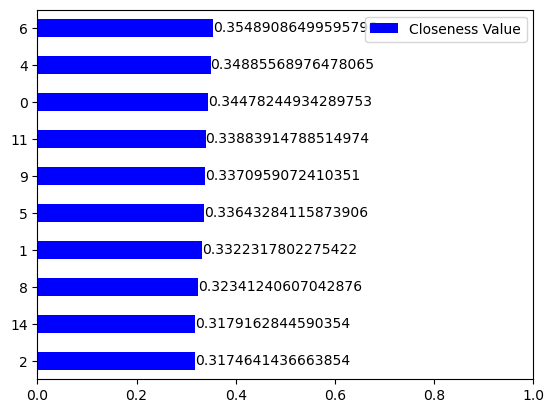

In [120]:
closeness_value_frame_ba = closeness_value_frame_ba.sort_values(by='Closeness Value', ascending=True)

fig = plt.figure()
ax = fig.add_subplot()

closeness_value_frame_ba.plot(kind='barh', color='blue', ax=ax)
plt.xlim(0, 1)

for y, x in enumerate(closeness_value_frame_ba['Closeness Value']):
    plt.annotate(str(x), xy=(x, y), va='center')

plt.show()

## Betweenness Centrality

In [121]:
betweenness_ba = nx.betweenness_centrality(ba) 

In [122]:
ranks = [(k, v) for k, v in sorted(betweenness_ba.items(), key=lambda item: -item[1])]
ranks[0:20]

[(6, 0.09821723465445145),
 (4, 0.08261801351092735),
 (0, 0.06875326874922978),
 (9, 0.06209536181816639),
 (11, 0.04722739221771502),
 (5, 0.04628812003315594),
 (1, 0.03830997193393642),
 (2, 0.02850481199131819),
 (3, 0.02761740858135558),
 (14, 0.02679357753417893),
 (8, 0.02657049513410861),
 (30, 0.025650723380492933),
 (54, 0.023133267485676942),
 (22, 0.022377041937994783),
 (21, 0.02230018444585685),
 (19, 0.020958971076682903),
 (16, 0.020442384788934686),
 (91, 0.01940440884723537),
 (18, 0.019128273786546957),
 (42, 0.019011320741387228)]

## Harmonic Centrality

In [123]:
harmonic_ba = nx.harmonic_centrality(ba)

In [124]:
ranks = [(k, v) for k, v in sorted(harmonic_ba.items(), key=lambda item: -item[1])]
ranks[0:20]

[(6, 5004.249999999961),
 (4, 4913.200000000018),
 (0, 4843.716666666714),
 (11, 4733.900000000113),
 (9, 4732.300000000108),
 (5, 4706.31666666679),
 (1, 4635.45000000016),
 (8, 4497.3000000002385),
 (14, 4431.116666666923),
 (2, 4425.883333333573),
 (3, 4425.433333333577),
 (30, 4404.983333333595),
 (18, 4348.383333333607),
 (19, 4332.6166666669415),
 (16, 4317.4000000002825),
 (42, 4308.550000000282),
 (22, 4297.133333333635),
 (21, 4279.016666666951),
 (54, 4268.833333333608),
 (91, 4268.050000000282)]

## PageRank Centrality

In [125]:
pagerank_ba = nx.pagerank(ba)

In [126]:
ranks = [(k, v) for k, v in sorted(pagerank_ba.items(), key=lambda item: -item[1])]
ranks[0:20]

[(6, 0.0032049834307313566),
 (4, 0.002848016585785977),
 (0, 0.002488496495286299),
 (9, 0.0023019792468274153),
 (5, 0.0018414094014553059),
 (11, 0.0017312740288612889),
 (3, 0.0015269224559676412),
 (14, 0.0014720780723467572),
 (54, 0.0014645178808727606),
 (2, 0.0014478898440321026),
 (1, 0.0014043395063553265),
 (22, 0.001382799522023541),
 (30, 0.0013444977841516625),
 (21, 0.001327348690621338),
 (8, 0.0012563001194573031),
 (58, 0.0011487357584820275),
 (19, 0.0011369987199560704),
 (91, 0.0011338413426145604),
 (42, 0.0011315043780494411),
 (16, 0.0011289518706562695)]

## Eigenvector Centrality

In [127]:
eigen_ba = nx.eigenvector_centrality(ba, max_iter = 500)

In [128]:
ranks = [(k, v) for k, v in sorted(eigen_ba.items(), key=lambda item: -item[1])]
ranks[0:20]

[(6, 0.40300522833750013),
 (4, 0.316410886481276),
 (0, 0.24350965909258163),
 (9, 0.16698347738154376),
 (5, 0.16200188823371173),
 (11, 0.15474372768737824),
 (1, 0.11847382368884109),
 (8, 0.10557631941156088),
 (3, 0.09503057391043075),
 (30, 0.08672879493430502),
 (14, 0.08468323681190802),
 (2, 0.07834360049875858),
 (18, 0.0739376819159769),
 (19, 0.0718905797933106),
 (42, 0.06759724272438809),
 (25, 0.06745293925545968),
 (91, 0.06681790173003017),
 (87, 0.06636923249477224),
 (22, 0.06389029711834054),
 (44, 0.06266446749174644)]

## Newman's Assortativity

In [129]:
nx.degree_assortativity_coefficient(ba)

-0.03766234389834267